In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [5]:
#File to load
crime_data_path = "crime_data.csv"

#Read crime_data and store into Pandas dataframe
crime_data = pd.read_csv(crime_data_path)
crime_data.head()

,Sac County City,Crimes,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Sacramento,Property Crimes,"21,001","20,200","18,563","19,967","17,980","15,078","16,501","15,283","14,683","15,417"
1,Sacramento,Burglary,"5,135","5,027","4,141","4,474","3,886","3,238","3,713","3,070","2,888","2,751"
2,Sacramento,Forcible Entry,"3,499","3,431","2,764","3,006","2,684","2,123","2,516","2,000","1,951","1,845"
3,Sacramento,No Force,"1,636","1,596","1,377","1,468","1,202","1,115","1,197","1,070",937,906
4,Sacramento,Residence,"3,918","3,750","2,958","3,185","2,908","2,236","2,523","2,017","1,830","1,679"


In [6]:
# Locate only 'Property Crimes'
pc_df = crime_data.loc[crime_data['Crimes'] == 'Property Crimes']
pc_df.head(7)

,Sac County City,Crimes,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Sacramento,Property Crimes,"21,001","20,200","18,563","19,967","17,980","15,078","16,501","15,283","14,683","15,417"
12,Citrus Heights,Property Crimes,"3,627","3,931","3,333","3,117","2,653","2,691","2,586","2,676","2,782","2,478"
24,Elk Grove,Property Crimes,"3,443","3,204","3,270","3,292","2,963","3,072","3,120","2,342","2,245","2,359"
36,Folsom,Property Crimes,"1,504","1,484","1,510","1,277","1,336","1,305","1,185","1,384","1,229","1,245"
48,Galt,Property Crimes,632,467,421,470,517,574,606,579,595,462
60,Isleton,Property Crimes,9,8,16,23,46,23,26,13,6,24
72,Rancho Cordova,Property Crimes,"1,928","2,293","1,904","2,107","2,202","1,644","1,726","1,435","1,410","1,388"


In [7]:
# Drop 'Crimes'
pc_total = pc_df.drop(['Crimes'], axis = 1) 
pc_total.head(7)

,Sac County City,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Sacramento,"21,001","20,200","18,563","19,967","17,980","15,078","16,501","15,283","14,683","15,417"
12,Citrus Heights,"3,627","3,931","3,333","3,117","2,653","2,691","2,586","2,676","2,782","2,478"
24,Elk Grove,"3,443","3,204","3,270","3,292","2,963","3,072","3,120","2,342","2,245","2,359"
36,Folsom,"1,504","1,484","1,510","1,277","1,336","1,305","1,185","1,384","1,229","1,245"
48,Galt,632,467,421,470,517,574,606,579,595,462
60,Isleton,9,8,16,23,46,23,26,13,6,24
72,Rancho Cordova,"1,928","2,293","1,904","2,107","2,202","1,644","1,726","1,435","1,410","1,388"


In [8]:
# return the transpose 
switch = pc_total.transpose() 
  
# Print the result 
switch.head(20)

,0,12,24,36,48,60,72
Sac County City,Sacramento,Citrus Heights,Elk Grove,Folsom,Galt,Isleton,Rancho Cordova
2009,"21,001","3,627","3,443","1,504",632,9,"1,928"
2010,"20,200","3,931","3,204","1,484",467,8,"2,293"
2011,"18,563","3,333","3,270","1,510",421,16,"1,904"
2012,"19,967","3,117","3,292","1,277",470,23,"2,107"
2013,"17,980","2,653","2,963","1,336",517,46,"2,202"
2014,"15,078","2,691","3,072","1,305",574,23,"1,644"
2015,"16,501","2,586","3,120","1,185",606,26,"1,726"
2016,"15,283","2,676","2,342","1,384",579,13,"1,435"
2017,"14,683","2,782","2,245","1,229",595,6,"1,410"


In [9]:

switch_new = pd.DataFrame({
    'Year':['2014','2015','2016','2017','2018'],
    'Sacramento':[15078,16501,15283,14683,15417],
    'Citrus Heights':[2691,2586,2676,2782,2478],
    'Elk Grove':[3072,3120,2342,2245,2359],
    'Folsom':[1305,1185,1384,1229,1245],
    'Galt':[574,606,579,595,462],
    'Isleton':[23,26,13,6,24],
    'Rancho Cordova':[1644,1726,1435,1410,1388],

})
switch_new.head()

,Year,Sacramento,Citrus Heights,Elk Grove,Folsom,Galt,Isleton,Rancho Cordova
0,2014,15078,2691,3072,1305,574,23,1644
1,2015,16501,2586,3120,1185,606,26,1726
2,2016,15283,2676,2342,1384,579,13,1435
3,2017,14683,2782,2245,1229,595,6,1410
4,2018,15417,2478,2359,1245,462,24,1388


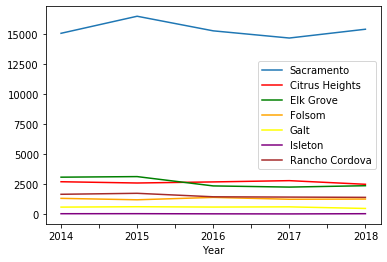

In [10]:
ax = plt.gca()

switch_new.plot(kind='line',x='Year',y='Sacramento',ax=ax)
switch_new.plot(kind='line',x='Year',y='Citrus Heights', color='red', ax=ax)
switch_new.plot(kind='line',x='Year',y='Elk Grove', color='green', ax=ax)
switch_new.plot(kind='line',x='Year',y='Folsom', color='orange', ax=ax)
switch_new.plot(kind='line',x='Year',y='Galt', color='yellow', ax=ax)
switch_new.plot(kind='line',x='Year',y='Isleton', color='purple', ax=ax)
switch_new.plot(kind='line',x='Year',y='Rancho Cordova', color='brown', ax=ax)

plt.show()

In [23]:
switch_new_rate = pd.DataFrame({
    'Year':['2014','2015','2016','2017','2018'],
    'Sacramento':[3.12,3.38,3.09,2.9,3.04],
    'Citrus Heights':[3.14,2.30,3.07,3.17,2.82],
    'Elk Grove':[1.89,1.88,1.39,1.31,1.37],
    'Folsom':[1.74,1.56,1.80,1.58,1.58],
    'Galt':[2.32,2.40,2.26,2.27,1.75],
    'Isleton':[2.79,3.13,1.56,0.71,2.85],
    'Rancho Cordova':[2.37,2.44,1.99,1.92,1.86],

})
switch_new_rate.head()

,Year,Sacramento,Citrus Heights,Elk Grove,Folsom,Galt,Isleton,Rancho Cordova
0,2014,3.12,3.14,1.89,1.74,2.32,2.79,2.37
1,2015,3.38,2.30,1.88,1.56,2.40,3.13,2.44
2,2016,3.09,3.07,1.39,1.80,2.26,1.56,1.99
3,2017,2.90,3.17,1.31,1.58,2.27,0.71,1.92
4,2018,3.04,2.82,1.37,1.58,1.75,2.85,1.86


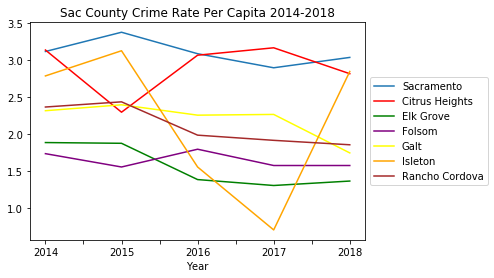

In [25]:
ax = plt.gca()

switch_new_rate.plot(kind='line',x='Year',y='Sacramento',ax=ax)
switch_new_rate.plot(kind='line',x='Year',y='Citrus Heights', color='red', ax=ax)
switch_new_rate.plot(kind='line',x='Year',y='Elk Grove', color='green', ax=ax)
switch_new_rate.plot(kind='line',x='Year',y='Folsom', color='purple', ax=ax)
switch_new_rate.plot(kind='line',x='Year',y='Galt', color='yellow', ax=ax)
switch_new_rate.plot(kind='line',x='Year',y='Isleton', color='orange', ax=ax)
switch_new_rate.plot(kind='line',x='Year',y='Rancho Cordova', color='brown', ax=ax)

plt.title("Sac County Crime Rate Per Capita 2014-2018")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

In [26]:
plt.savefig("Sac County Crime Rate Per Capita 2014-2018")

<Figure size 432x288 with 0 Axes>

In [14]:
pc_row = pc_total.melt(id_vars=["Sac County City"], 
        var_name="Date", 
        value_name="Value")
pc_row.head(20)

,Sac County City,Date,Value
0,Sacramento,2009,"21,001"
1,Citrus Heights,2009,"3,627"
2,Elk Grove,2009,"3,443"
3,Folsom,2009,"1,504"
4,Galt,2009,632
5,Isleton,2009,9
6,Rancho Cordova,2009,"1,928"
7,Sacramento,2010,"20,200"
8,Citrus Heights,2010,"3,931"
9,Elk Grove,2010,"3,204"


In [15]:
pc_row = pc_total.melt(id_vars=["Sac County City"], 
        var_name="Date", 
        value_name="Value")
pc_row.head(20)

,Sac County City,Date,Value
0,Sacramento,2009,"21,001"
1,Citrus Heights,2009,"3,627"
2,Elk Grove,2009,"3,443"
3,Folsom,2009,"1,504"
4,Galt,2009,632
5,Isleton,2009,9
6,Rancho Cordova,2009,"1,928"
7,Sacramento,2010,"20,200"
8,Citrus Heights,2010,"3,931"
9,Elk Grove,2010,"3,204"


In [16]:
pc_total.set_index("Sac County City", inplace=True)
pc_total.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Sac County City,,,,,,,,,,
Sacramento,"21,001","20,200","18,563","19,967","17,980","15,078","16,501","15,283","14,683","15,417"
Citrus Heights,"3,627","3,931","3,333","3,117","2,653","2,691","2,586","2,676","2,782","2,478"
Elk Grove,"3,443","3,204","3,270","3,292","2,963","3,072","3,120","2,342","2,245","2,359"
Folsom,"1,504","1,484","1,510","1,277","1,336","1,305","1,185","1,384","1,229","1,245"
Galt,632,467,421,470,517,574,606,579,595,462


In [17]:
# Collect the mean crime rates for sac county
average_crime = pc_total.mean()

# Collect the years where data was collected
years = average_crime.keys()


KeyError: "None of [Index(['Sac County City'], dtype='object')] are in the [columns]"

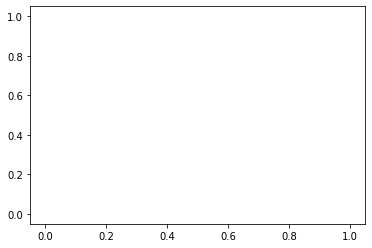

In [18]:
# Plot the world average as a line chart
crime_avg, = plt.plot(years, average_crime, color="blue", label="Sac County Cities Average" )

# Plot the unemployment values for a single country
one_sacramento, = plt.plot(years, pc_total.loc['Sacramento',["2010","2011","2012","2013","2014"]], 
                        color="green",label=pc_total.loc[['Sacramento'],["Sac County City"]])

# Create a legend for our chart
plt.legend(handles=[crime_avg, one_sacramento], loc="best")

# Show the chart
plt.show()

In [19]:
#File to load population
pop_data_path = "population_data_updated2.xlsx"

#Read crime_data and store into Pandas dataframe
pop_data = pd.read_excel(pop_data_path)
pop_data.head(7)

,Sac County City,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Citrus Heights,83273,83781,84308,84924,85665,86543,87179,87675,87707,87796
1,Elk Grove,153375,155615,158083,160251,162701,165997,169156,171425,172603,174775
2,Folsom,72110,72542,73042,72782,74950,75935,76999,77798,78842,81328
3,Galt,23739,24142,24274,24433,24760,25226,25619,26167,26378,26536
4,Isleton,805,810,815,819,824,830,835,844,843,844
5,Rancho Cucamonga,65067,65970,66725,67722,69389,70640,72162,73398,74478,75087
6,Sacramento,467286,470902,474226,478214,482762,488133,494127,500777,507737,513624


In [20]:
# Create crime rate per capita dataframe 
df = pd.DataFrame({
    'Sac County City':['Sacramento','Citrus Heights','Elk Grove','Folsom','Galt','Isleton','Rancho Cordova'],
    'Crime Rate':[3.04,2.83,1.37,1.58,1.75,2.85,1.86],
})
df.head(7)

,Sac County City,Crime Rate
0,Sacramento,3.04
1,Citrus Heights,2.83
2,Elk Grove,1.37
3,Folsom,1.58
4,Galt,1.75
5,Isleton,2.85
6,Rancho Cordova,1.86


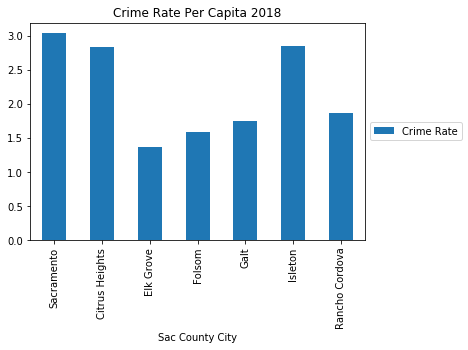

In [21]:
# Plot bar for crime rate per capita
df.plot(kind='bar',x='Sac County City',y='Crime Rate')
plt.title("Crime Rate Per Capita 2018")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [22]:
plt.savefig("Crime Rate Per Capita 2018")

<Figure size 432x288 with 0 Axes>